# Intro

This is a collection of notes on example usage and some additional notes for pdapt

In [1]:
# check version
import sys
print('using python version =',sys.version)

using python version = 3.4.2 (default, Jul  9 2015, 17:24:30) 
[GCC 5.1.1 20150618 (Red Hat 5.1.1-4)]


## Anscombe's Quartet Example

In [1]:
import os
os.chdir('/home/matej/develop/pdapt')
os.getcwd()

'/home/matej/develop/pdapt'

In [15]:
# load anscombe data
a1 = [(10.0,8.04),(8.0,6.95),(13.0,7.58),(9.0,8.81),(11.0,8.33),(14.0,9.96),(6.0,7.24),(4.0,4.26),(12.0,10.84),(7.0,4.82),(5.0,5.68)]
a1_x, a1_y = zip(*a1)
a2_x =[10,8,13,9,11,14,6,4,12,7,5]
a2_x = [float(i) for i in a2_x]
a2_y =[9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74]
a3_x =[10,8,13,9,11,14,6,4,12,7,5]
a3_x = [float(i) for i in a3_x]
a3_y =[7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73]
a4_x = [8, 8, 8,8,8,8,8,19,8,8,8]
a4_x = [float(i) for i in a4_x]
a4_y = [6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89]
a_xs = [a1_x, a2_x, a3_x, a4_x]
a_ys = [a1_y, a2_y, a3_y, a4_y]

In [4]:
# import pdapt stuff
import pdapt_lib.machine_learning.stats as pstats

In [5]:
pstats.standard_deviation(a1_x)

3.3166247903554

In [19]:
# summary stats for each set should be same eg compare means
for x in a_xs:
    pstats.summary(x)
    print()

Minimum:   4.000000
Q1:        5.000000
median:    9.000000
mean:      9.000000
Q3:        11.000000
Maximum:   14.000000
Std dev:   3.316625
Outliers > 1.5 IQR: []

Minimum:   4.000000
Q1:        5.000000
median:    9.000000
mean:      9.000000
Q3:        11.000000
Maximum:   14.000000
Std dev:   3.316625
Outliers > 1.5 IQR: []

Minimum:   4.000000
Q1:        5.000000
median:    9.000000
mean:      9.000000
Q3:        11.000000
Maximum:   14.000000
Std dev:   3.316625
Outliers > 1.5 IQR: []

Minimum:   8.000000
Q1:        8.000000
median:    8.000000
mean:      9.000000
Q3:        8.000000
Maximum:   19.000000
Std dev:   3.316625
Outliers > 1.5 IQR: [19.0]



In [18]:
for y in a_ys:
    pstats.summary(y)
    print()

Minimum:   4.260000
Q1:        4.820000
median:    7.580000
mean:      7.500909
Q3:        8.330000
Maximum:   10.840000
Std dev:   2.031568
Outliers > 1.5 IQR: []

Minimum:   3.100000
Q1:        4.740000
median:    8.140000
mean:      7.500909
Q3:        8.770000
Maximum:   9.260000
Std dev:   2.031657
Outliers > 1.5 IQR: []

Minimum:   5.390000
Q1:        5.730000
median:    7.110000
mean:      7.500000
Q3:        7.810000
Maximum:   12.740000
Std dev:   2.030424
Outliers > 1.5 IQR: [12.74]

Minimum:   5.250000
Q1:        5.560000
median:    7.040000
mean:      7.500909
Q3:        7.910000
Maximum:   12.500000
Std dev:   2.030579
Outliers > 1.5 IQR: [12.5]



# Probability examples

In [78]:
import math
import random
from collections import Counter
from __future__ import division  # this is tres important

In [71]:
def normal_pdf(x, mu=0,sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return(math.exp(-(x-mu)**2/2/sigma**2) / (sqrt_two_pi * sigma))

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

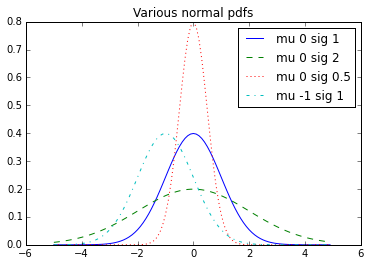

In [6]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu 0 sig 1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu 0 sig 2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu 0 sig 0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu -1 sig 1')
plt.legend()
plt.title('Various normal pdfs')
plt.show()

In [12]:
def uniform_cdf(x):
    "return probability that a uniform random variable is < = x"
    if x < 0: return 0
    if x > 1: return x
    else: return 1

In [73]:
def normal_cdf(x, mu=0, sigma=1):
    return (1+math.erf((x-mu)/ math.sqrt(2)/ sigma))/2

In [74]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [75]:
def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [79]:
def make_hist(p, n, num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()],
            [v/num_points for v in histogram.values()],
            0.8)
    #plt.axis([0,100,0,0.10])
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

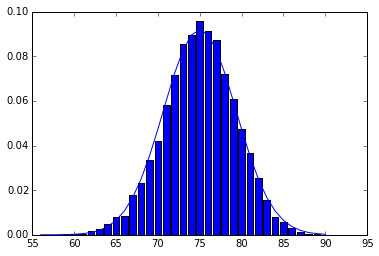

In [80]:
make_hist(0.75,100,10000)

## test gaussian distribution

In [26]:
import numpy as np
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000) # 1000 means collect a 1000 samples

In [27]:
#Verify the mean and the variance:
print(abs(mu - np.mean(s)) < 0.01)
print(abs(sigma - np.std(s, ddof=1)) < 0.01)

True
True


In [28]:
#Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
%matplotlib inline

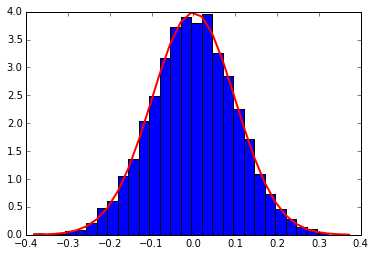

In [29]:
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)),linewidth=2, color='r')
plt.show()

so the 0.1 is indeed the standard deviation, ie 68 percent chance data falls inbetween -0.1 and 0.1. Also can see how far max min is..about 0.4

# Statistics examples

In [14]:
a = [1,2,3,4,5,6]

In [15]:
len(a)

6

In [16]:
sum(a)

21

In [17]:
sum(a)/len(a)

3.5

In [32]:
b = [0,0,1,2,2,5]

In [33]:
from collections import defaultdict
counts = defaultdict(int)
for i in b:
    counts[i]+= 1

In [34]:
counts.values()

dict_values([2, 1, 2, 1])

In [35]:
counts[5]

1

In [1]:
import scipy.stats as scs # Follow the norm! It makes code more re-usable.

## Useful distributions

### distribution methods

In [ ]:
dist.rvs(size = n) # return n random variates that follow distribution dist. 
dist.pdf(x) # Return the pdf of x in distribution dist. 
dist.cdf(x) # Return the cdf of x in distribution dist. 
dist.sf(x) # Returns survival function (1 - cdf) of x in distribution dist.

## standard error 

# ipython examples

to start notebook:

In [ ]:
ipython notebook

hit esp for command mode: 
    * a for adding cell above or 
    * b for below, 
    * m key to go to markdown
    * h for keyboard shortcuts
    * y for code
    * for help on a function click within parens then hit S-tab twice

to display latex equations:

In [2]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

an alternative is to use %%latex, 

In [3]:
%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<IPython.core.display.Latex object>

In [1]:
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

can also do it in markdown mode, eg using dollar symbols around equation:
$$c = \sqrt{a^2 + b^2}$$

# R interface

20 most popular ML tools in R

**e1071** 
        
        Functions for latent class analysis, short time Fourier transform, fuzzy clustering, support vector machines, shortest path computation, bagged clustering, naive Bayes classifier etc (142479 downloads)

**rpart** 
        
        Recursive Partitioning and Regression Trees. (135390)
    
**igraph** 
        
         A collection of network analysis tools. (122930)
    
**nnet** 
        
        Feed-forward Neural Networks and Multinomial Log-Linear Models. (108298)
    
**randomForest** 
        
        Breiman and Cutler's random forests for classification and regression. (105375)
    
**caret** 
            
       package (short for Classification And REgression Training) is a set of functions that attempt to streamline the process for creating predictive models. (87151)
    
**kernlab** 
        
        Kernel-based Machine Learning Lab. (62064)
    
**glmnet** 

        Lasso and elastic-net regularized generalized linear models. (56948)
    
**ROCR** 
        
        Visualizing the performance of scoring classifiers. (51323)
    
**gbm**
        
        Generalized Boosted Regression Models. (44760)

**party** 
        
        A Laboratory for Recursive Partitioning. (43290)
    
**arules** 

    Mining Association Rules and Frequent Itemsets. (39654)

**tree** 
        
    Classification and regression trees. (27882)

**klaR** 

    Classification and visualization. (27828)

**RWeka** 
        
    R/Weka interface. (26973)
    
**ipred** 
    
    Improved Predictors. (22358)
    
**lars** 

    Least Angle Regression, Lasso and Forward Stagewise. (19691)
    
**earth** 

    Multivariate Adaptive Regression Spline Models. (15901)
    
**CORElearn** 
    
    Classification, regression, feature evaluation and ordinal evaluation. (13856)

**mboost** 
            
    Model-Based Boosting.

# Scikit-learn examples (to cross-check pdapt)

In [2]:
from sklearn.datasets import load_iris

In [3]:
# save a bunch object
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

actually I am making a separate notebook for this

# Functional stuff

In [9]:
a = [1,2,3]
# actually have to iterate the generator
b = list(map(lambda x: x**x, a))
print(b)

[1, 4, 27]


In [26]:
from functools import reduce
s = 'azcbobobegghakl'
s = list(s)
print(s)
vowels = ['a','i','e','o','u']
number_of_vowels = reduce(lambda x,y: x + 1 if y in vowels else x, s, 0)
#s_vowels = filter(lambda x: x if x in vowels)
#number_of_vowels = len(s_vowels)
print("Number of vowels: ", number_of_vowels)

['a', 'z', 'c', 'b', 'o', 'b', 'o', 'b', 'e', 'g', 'g', 'h', 'a', 'k', 'l']
Number of vowels:  5


In [32]:
# do it with filter now
s = 'azcbobobegghakl'
s = list(s)
print(s)
vowels = ['a','i','e','o','u']
s_vowels = list(filter(lambda x: x in vowels, s))
number_of_vowels = len(s_vowels)
print("Number of vowels: ", number_of_vowels)

['a', 'z', 'c', 'b', 'o', 'b', 'o', 'b', 'e', 'g', 'g', 'h', 'a', 'k', 'l']
Number of vowels:  5


In [10]:
# number of bobs
t = 'azcbobobegghakl'
s = 'bob'
occurences = [1 if s==t[i:i+len(s)] else 0 for i in range(len(t)-len(s))]
n_bob = sum(occurences)
print("number of bob occurences: ",n_bob)

('number of bob occurences: ', 2)


In [11]:
# random thing..to get a number connected  with a character:
c ='m'
ord(c)


109

In [17]:
# play with lists
a = ['B-RAS', 'OR', 'b-Ras', 'OR','B-Ras']
terms = list(filter(lambda x: x != 'OR', a))
print(terms)
lines = ['line 1 with B-RAS', 'line2 with b-Ras', 'line3 with B-Ras', 'line 3 with b-Ras and B-Ras']
line = lines[0]
counts = [ line.count(x) for x in terms]
print(counts)
print(sum(counts))
if any(x in line.split() for x in terms):
    print(line)

['B-RAS', 'b-Ras', 'B-Ras']
[1, 0, 0]
1
line 1 with B-RAS


In [1]:
lines = {'gold leader': 14, 'red ten': 7, 'boushh': 7, 'tarkin': 28, 'jerjerrod': 7, 'jabba': 26, 'emperor': 39, 'luke': 365, 'intercom voice': 6, 'threepio': 208, 'ackbar': 14, 'leia': 113, "ben's voice": 6, 'dodonna': 6, 'officer': 12, 'death star intercom voice': 6, 'greedo': 6, 'biggs': 34, 'owen': 25, 'vader': 84, 'gold five': 7, 'han': 276, 'lando': 40, 'commander': 10, 'ninedenine': 6, 'wedge': 25, 'first trooper': 6, 'yoda': 13, 'ben': 94, 'aunt beru': 6, 'trooper': 19, 'stormtrooper': 6, 'red leader': 37, 'bib': 6, 'piett': 8}

In [11]:
sorted_lines = sorted(lines.items(), key=lambda x: x[1])
print(sorted_lines)

[('first trooper', 6), ('intercom voice', 6), ('ninedenine', 6), ('stormtrooper', 6), ('aunt beru', 6), ('dodonna', 6), ('greedo', 6), ('death star intercom voice', 6), ("ben's voice", 6), ('bib', 6), ('gold five', 7), ('red ten', 7), ('boushh', 7), ('jerjerrod', 7), ('piett', 8), ('commander', 10), ('officer', 12), ('yoda', 13), ('gold leader', 14), ('ackbar', 14), ('trooper', 19), ('owen', 25), ('wedge', 25), ('jabba', 26), ('tarkin', 28), ('biggs', 34), ('red leader', 37), ('emperor', 39), ('lando', 40), ('vader', 84), ('ben', 94), ('leia', 113), ('threepio', 208), ('han', 276), ('luke', 365)]


In [12]:
print(sorted_lines[-1][0])

luke


In [19]:
the_list = [3,5,8,10,15,17,19]
from functools import reduce
sum = reduce(lambda acc,i: acc+i*2, the_list, 0)
print(sum)

154


In [30]:
lolists = [[1,2,3], [10,15,14], [10.1,8.7,2.3]]
[i[0] for i in lolists]

[1, 10, 10.1]

In [32]:
slice_me = [7,6,4,5,6]
# for index 2 to 3 do this
slice1 = slice_me[2:4] #last element is exclusive
slice2 = [slice_me[1]] 
slice3 = slice_me[3:5]
print(slice1,slice2,slice3)

[4, 5] [6] [5, 6]


In [33]:
us_presidents = ["Adams", "Bush", "Clinton", "Obama", "Harrison", "Taft", "Bush", "Adams", "Wilson", "Roosevelt", "Roosevelt"]


In [38]:
from collections import defaultdict
us_president_counts = defaultdict(int)
# finally a slightly fun exercise...
for i in us_presidents:
    us_president_counts[i] +=1
list(us_president_counts.items())

[('Wilson', 1),
 ('Roosevelt', 2),
 ('Taft', 1),
 ('Obama', 1),
 ('Harrison', 1),
 ('Clinton', 1),
 ('Bush', 2),
 ('Adams', 2)]

In [1]:
# can check if in list or dict easily with in
weather = ['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Sunny', 'Fog', 'Rain', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Fog', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Fog', 'Fog', 'Fog']
weather_counts = {}
for i in weather:
    if i in weather_counts:  # here
        weather_counts[i] +=1
    else:
        weather_counts[i] = 1

list(weather_counts.items())

[('Sunny', 16), ('Rain', 2), ('Fog', 5)]

## random search

In [2]:
param_grid = {'learning_rate': [0.1, 0.02, 0.01, 0.001],
              'max_depth': [1,2,4,8,None],
              'min_samples_leaf': [8, 3],
              'min_samples_split':[2, 4],
              'max_features': [10,50,100,None],
              'subsample': [0.1,0.5,0.7]
              }


In [4]:
import random

In [6]:
random.choice(param_grid['learning_rate'])

0.1

In [11]:
test_list = [(1,2,0.1),(2,3,0.3),(0,1,0.2)]

In [12]:
test_list.sort(key= lambda x: x[2])
print(test_list)

[(1, 2, 0.1), (0, 1, 0.2), (2, 3, 0.3)]


In [2]:
list(range(2009,2014))

[2009, 2010, 2011, 2012, 2013]

# Recurrent Neural networks (RNNs)

In [2]:
import nltk

In [4]:
import csv
import itertools
import operator
import numpy as np
import nltk
import sys
from datetime import datetime
from utils import *

In [5]:
# Download NLTK model data (you need to do this once)
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/matej/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /home/matej/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/matej/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/matej/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/matej/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/matej/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /home/matej/nltk_data...
[nltk_data]    |  

True

In [10]:
import os
os.chdir('/home/matej/develop/pdapt/pdapt_lib/ann')

In [11]:
os.getcwd()

'/home/matej/develop/pdapt/pdapt_lib/ann'

In [19]:
vocabulary_size = 8000
unknown_token = "UNKNOWN_TOKEN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"

# Read the data and append SENTENCE_START and SENTENCE_END tokens
print("Reading CSV file...")
with open('data/reddit-comments-2015-08.csv', 'r') as f:
    reader = csv.reader(f, skipinitialspace=True)
    #reader.next()
    # Split full comments into sentences
    #sentences = itertools.chain(*[nltk.sent_tokenize(x[0].decode('utf-8').lower()) for x in reader])
    sentences = itertools.chain(*[nltk.sent_tokenize(x[0].lower()) for x in reader])
    # Append SENTENCE_START and SENTENCE_END
    sentences = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in sentences]

    

Reading CSV file...


In [22]:
print("Parsed {0:d} sentences.".format(len(sentences)))

Parsed 79171 sentences.


In [23]:
# Tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))

In [48]:
print("Found {0:d} unique words tokens.".format(len(word_freq.items())))

Found 65752 unique words tokens.


In [25]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])

In [47]:
print("Using vocabulary size {0:d}.".format(vocabulary_size))
print("The least frequent word in our vocabulary is {0} and appeared {1:d} times.".format(vocab[-1][0], vocab[-1][1]))

Using vocabulary size 8000.
The least frequent word in our vocabulary is //github.com/meditonsin/nightmirrormoon and appeared 10 times.


In [31]:
# Replace all words not in our vocabulary with the unknown token
for i, sent in enumerate(tokenized_sentences):
    tokenized_sentences[i] = [w if w in word_to_index else unknown_token for w in sent]


In [32]:
print("\nExample sentence: '{0}'".format(sentences[0]))
print("\nExample sentence after Pre-processing: '{0}'".format(tokenized_sentences[0]))


Example sentence: 'SENTENCE_START body SENTENCE_END'

Example sentence after Pre-processing: '['SENTENCE_START', 'body', 'SENTENCE_END']'


In [33]:
# Create the training data
X_train = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_sentences])
y_train = np.asarray([[word_to_index[w] for w in sent[1:]] for sent in tokenized_sentences])

In [45]:
# Print an training data example
x_example, y_example = X_train[18], y_train[18]
print("x: {0}".format(" ".join([index_to_word[x] for x in x_example])))
print("y: {0}".format(" ".join([index_to_word[x] for x in y_example])))

x: SENTENCE_START what are n't you understanding about this ? !
y: what are n't you understanding about this ? ! SENTENCE_END
